References:

https://docs.matlantis.com/atomistic-simulation-tutorial/en/4_2_phonon.html

https://lampz.tugraz.at/~hadley/ss1/phonons/fcc/fcc.php

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Lattice parameter
a = 5.42 #[Å] but this doen't matter to the phonon dispersion.

# Primitive vectors of FCC
a1 = a*np.array([0., 1/2, 1/2])
a2 = a*np.array([1/2, 0., 1/2])
a3 = a*np.array([1/2, 1/2, 0.])

# Basis
t1 = a*np.array([0., 0., 0.])
t2 = a*np.array([1/4, 1/4, 1/4])

# Other used vectors
ta1 = t2 - a1
ta2 = t2 - a2
ta3 = t2 - a3
a12 = a1 - a2
a23 = a2 - a3
a31 = a3 - a1

In [3]:
# Reciprocal vector
def q(x,y,z):
    vector = np.array([x, y, z])
    return vector

# Define the dot products
def qa1(x,y,z):
    dot1 = np.dot(q(x,y,z), a1)
    return dot1

def qa2(x,y,z):
    dot2 = np.dot(q(x,y,z), a2)
    return dot2

def qa3(x,y,z):
    dot3 = np.dot(q(x,y,z), a3)
    return dot3

def qa31(x,y,z):
    dot31 = np.dot(q(x,y,z), a31)
    return dot31

def qa23(x,y,z):
    dot23 = np.dot(q(x,y,z), a23)
    return dot23

def qa12(x,y,z):
    dot12 = np.dot(q(x,y,z), a12)
    return dot12

In [4]:
# 1 Vectors

# Basis
pt1 = np.array([0., 0., 0.])
pt2 = np.array([1, 1, 1])

# Other used vectors
pta1  = np.array([-1, 1, 1])

pta2  = np.array([1, -1, 1])

pta3 = np.array([1, 1, -1])

pa1 = np.array([0., 1., 1.])
pa2 = np.array([1., 0., 1.])
pa3 = np.array([1., 1., 0.])

pa12 = np.array([-1., 1., 0.])
pa23 = np.array([0., -1., 1.])
pa31 = np.array([1., 0., -1.])



In [5]:
# Useful arrays
integer = [0,1,2]

# Define the matrix

# Nearest neigbhors.
def G1(x,y,z):
    
    G1 = np.zeros((6,6), dtype ='complex')
    
    for i in (integer):
        for j in (integer):
            
            G1[i][j] = 2*(pt2[i]*pt2[j] + pta1[i]*pta1[j] + pta2[i]*pta2[j] + pta3[i]*pta3[j])
           
            G1[i+3][j+3] = G1[i][j]
            
            G1[i][j+3]  = - 2*pt2[i]*pt2[j] - pta1[i]*pta1[j]*2*np.exp(-1j*qa1(x,y,z))
            
            G1[i][j+3] += - pta2[i]*pta2[j]*2*np.exp(-1j*qa2(x,y,z))
            
            G1[i][j+3] += - pta3[i]*pta3[j]*2*np.exp(-1j*qa3(x,y,z))
                     
            G1[j+3][i] = np.conjugate(G1[i][j+3])
    
    return G1     

In [6]:
index = [0,1,2,3,4,5]

A = G1(0,0,0)

for i in range(6):
    print("{:3.4f},{:3.4f},{:3.4f},{:3.4f},{:3.4f},{:3.4f}".
          format(A[i][0],A[i][1],A[i][2],A[i][3],A[i][4],A[i][5]))

8.0000+0.0000j,0.0000+0.0000j,0.0000+0.0000j,-8.0000+0.0000j,0.0000+0.0000j,0.0000+0.0000j
0.0000+0.0000j,8.0000+0.0000j,0.0000+0.0000j,0.0000+0.0000j,-8.0000+0.0000j,0.0000+0.0000j
0.0000+0.0000j,0.0000+0.0000j,8.0000+0.0000j,0.0000+0.0000j,0.0000+0.0000j,-8.0000+0.0000j
-8.0000-0.0000j,0.0000-0.0000j,0.0000-0.0000j,8.0000+0.0000j,0.0000+0.0000j,0.0000+0.0000j
0.0000-0.0000j,-8.0000-0.0000j,0.0000-0.0000j,0.0000+0.0000j,8.0000+0.0000j,0.0000+0.0000j
0.0000-0.0000j,0.0000-0.0000j,-8.0000-0.0000j,0.0000+0.0000j,0.0000+0.0000j,8.0000+0.0000j


In [7]:
# Second Nearest neigbhors (FCC).
def G2(x,y,z):
    
    G2 = np.zeros((6,6))
    
    for i in (integer):
        for j in (integer):
            
            G2[i][j] = 4*(pa1[i]*pa1[j] + pa2[i]*pa2[j] + pa3[i]*pa3[j] + pa31[i]*pa31[j] + pa23[i]*pa23[j] + pa12[i]*pa12[j] )
            G2[i][j] += - 2*pa1[i]*pa1[j]*2*np.cos(qa1(x,y,z))
            G2[i][j] += - 2*pa2[i]*pa2[j]*2*np.cos(qa2(x,y,z))
            G2[i][j] += - 2*pa3[i]*pa3[j]*2*np.cos(qa3(x,y,z))
            G2[i][j] += - 2*pa31[i]*pa31[j]*2*np.cos(qa31(x,y,z))
            G2[i][j] += - 2*pa23[i]*pa23[j]*2*np.cos(qa23(x,y,z))
            G2[i][j] += - 2*pa12[i]*pa12[j]*2*np.cos(qa12(x,y,z))
            
            G2[i+3][j+3] = G2[i][j]
    
    return G2     

In [8]:
index = [0,1,2,3,4,5]

A = 1/4*G2(0,0,0) + 1/6*G1(0,0,0)

for i in range(6):
    print("{:3.4f},{:3.4f},{:3.4f},{:3.4f},{:3.4f},{:3.4f}".
          format(A[i][0],A[i][1],A[i][2],A[i][3],A[i][4],A[i][5]))

1.3333+0.0000j,0.0000+0.0000j,0.0000+0.0000j,-1.3333+0.0000j,0.0000+0.0000j,0.0000+0.0000j
0.0000+0.0000j,1.3333+0.0000j,0.0000+0.0000j,0.0000+0.0000j,-1.3333+0.0000j,0.0000+0.0000j
0.0000+0.0000j,0.0000+0.0000j,1.3333+0.0000j,0.0000+0.0000j,0.0000+0.0000j,-1.3333+0.0000j
-1.3333+0.0000j,0.0000+0.0000j,0.0000+0.0000j,1.3333+0.0000j,0.0000+0.0000j,0.0000+0.0000j
0.0000+0.0000j,-1.3333+0.0000j,0.0000+0.0000j,0.0000+0.0000j,1.3333+0.0000j,0.0000+0.0000j
0.0000+0.0000j,0.0000+0.0000j,-1.3333+0.0000j,0.0000+0.0000j,0.0000+0.0000j,1.3333+0.0000j


In [9]:
# Solve the eigenvalue equation along a certain path in Brillouin Zone.
N = 100

# K point
G = 2*np.pi/a*np.array([0., 0., 0.]) # Gamma-point
X = 2*np.pi/a*np.array([0., 1., 0.])
W = 2*np.pi/a*np.array([1/2, 1., 0.])
K = 2*np.pi/a*np.array([3/4, 3/4, 0.])

# Path: G-X
x_GX= np.zeros(int(N)) # x=0
y_GX =2*np.pi/a*np.linspace(0.,1. , int(N)) # Don't forget 2pi!!!
z_GX = np.zeros(int(N)) # z=0

# Path: X-W
x_XW =2*np.pi/a*np.linspace(0., 1/2, int(N/2))
y_XW = 2*np.pi/a*np.ones(int(N/2))
z_XW = np.zeros(int(N/2)) # z=0

# Path: W-K
x_WK =2*np.pi/a*np.linspace(1/2, 3/4, int(N/(2*np.sqrt(2))))
y_WK = 2*np.pi/a*np.linspace(3/4, 1., int(N/(2*np.sqrt(2))))
y_WK = y_WK[::-1]
z_WK = np.zeros(int(N/(2*np.sqrt(2)))) # z=0

# Path: K-G
x_KG =2*np.pi/a*np.linspace(0., 3/4, int(N*(9/8)))
x_KG = x_KG[::-1]
y_KG = 2*np.pi/a*np.linspace(0., 3/4, int(N*(9/8)))
y_KG = y_KG[::-1]
z_KG = np.zeros(int(N*(9/8))) # z=0

# Path: G-L
x_GL = 2*np.pi/a*np.linspace(0., 1/2, int(N*(np.sqrt(3)/2)))
y_GL = 2*np.pi/a*np.linspace(0., 1/2, int(N*(np.sqrt(3)/2)))
z_GL = 2*np.pi/a*np.linspace(0., 1/2, int(N*(np.sqrt(3)/2)))

# Connect the path
x_path = np.concatenate([x_GX, x_XW[1::], x_WK[1::], x_KG[1::], x_GL[1::]])
y_path = np.concatenate([y_GX, y_XW[1::], y_WK[1::], y_KG[1::], y_GL[1::]])
z_path = np.concatenate([z_GX, z_XW[1::], z_WK[1::], z_KG[1::], z_GL[1::]])

# Just for plotting
index_tot = int(N) + int(N/2) + int(N/(2*np.sqrt(2))) + int(N*(9/8)) 
index_tot += int(N*(np.sqrt(3)/2)) - 4
plot_path = np.arange(0, int(index_tot))

In [10]:
dispersion_fcc = []
for x,y,z in zip(x_path ,y_path, z_path):
    G = 1/2*1/2*G2(x,y,z) 
    eigen = np.linalg.eigvalsh(G)
    eigen = np.sort(eigen)
    eigen = np.sqrt(eigen) # Take square root!
    dispersion_fcc.append(eigen)
    
dispersion_fccT = np.transpose(dispersion_fcc)

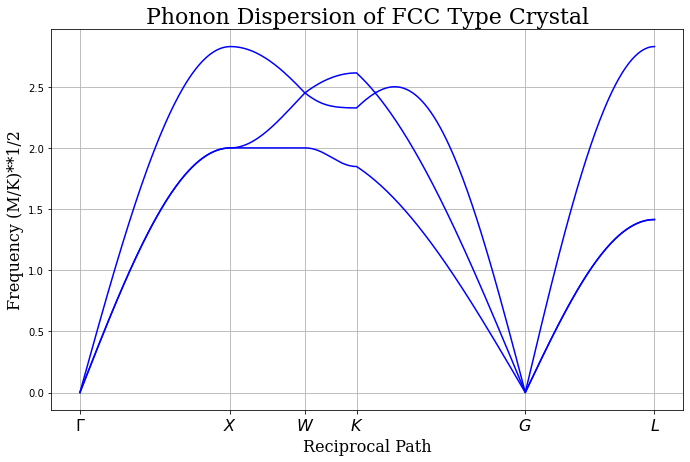

In [11]:
gr = (1+ np.sqrt(5))/2
# Make a plot of the phonon dispersion.
fig1 = plt.figure(figsize = (7*gr,7))
ax = fig1.gca()

for i in range(0,6,2):
    ax.plot(plot_path, dispersion_fccT[i], color="blue") 

ax.set_title("Phonon Dispersion of FCC Type Crystal", fontfamily = "serif", fontsize = 22)
ax.set_xlabel( "Reciprocal Path", fontfamily = "serif", fontsize = 16)
ax.set_ylabel("Frequency (M/K)**1/2", fontfamily = "serif", fontsize = 16)

ticks = ["$ \Gamma $", "$ X $", "$ W $", "$ K $", "$ G $", "$L$"]
ax.set_xticks([0, int(N)-1, int(N) + int(N/2) -2, int(N) + int(N/2) + int(N/(2*np.sqrt(2))) -3, 
               int(N) + int(N/2) + int(N/(2*np.sqrt(2))) + int(N*(9/8)) -4,
               int(N) + int(N/2) + int(N/(2*np.sqrt(2))) + int(N*(9/8))+ int(N*(np.sqrt(3)/2)) -5])
ax.set_xticklabels(ticks, fontfamily = "serif", fontsize = 16)
ax.grid(True)

In [12]:
dispersion_Sinn = []
for x,y,z in zip(x_path ,y_path, z_path):
    G = 1/6*G1(x,y,z)
    eigen = np.linalg.eigvalsh(G)
    eigen = np.sort(eigen)
    eigen = np.sqrt(eigen) #Take square root!
    dispersion_Sinn.append(eigen)
    
dispersion_SinnT = np.transpose(dispersion_Sinn)

<ipython-input-12-a98d05178e28>:6: RuntimeWarning: invalid value encountered in sqrt
  eigen = np.sqrt(eigen) #Take square root!


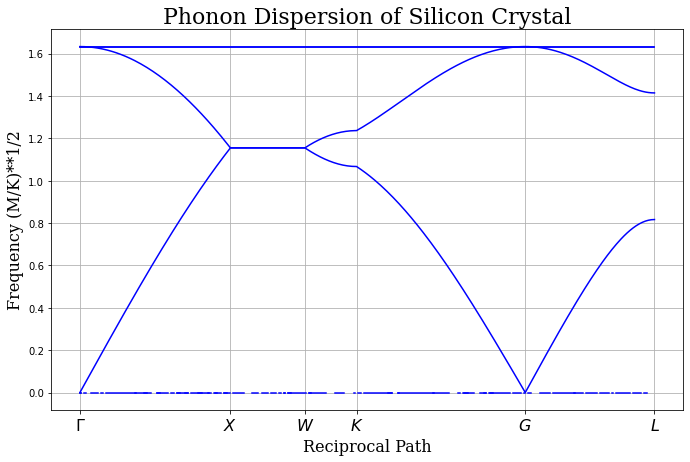

In [13]:
gr = (1+ np.sqrt(5))/2
# Make a plot of the phonon dispersion.
fig2 = plt.figure(figsize = (7*gr,7))
ax = fig2.gca()

for i in range(6):
    ax.plot(plot_path, dispersion_SinnT[i], color="blue") 

ax.set_title("Phonon Dispersion of Silicon Crystal", fontfamily = "serif", fontsize = 22)
ax.set_xlabel( "Reciprocal Path", fontfamily = "serif", fontsize = 16)
ax.set_ylabel("Frequency (M/K)**1/2", fontfamily = "serif", fontsize = 16)

ticks = ["$ \Gamma $", "$ X $", "$ W $", "$ K $", "$ G $", "$L$"]
ax.set_xticks([0, int(N)-1, int(N) + int(N/2) -2, int(N) + int(N/2) + int(N/(2*np.sqrt(2))) -3, 
               int(N) + int(N/2) + int(N/(2*np.sqrt(2))) + int(N*(9/8)) -4,
               int(N) + int(N/2) + int(N/(2*np.sqrt(2))) + int(N*(9/8))+ int(N*(np.sqrt(3)/2)) -5])
ax.set_xticklabels(ticks, fontfamily = "serif", fontsize = 16)
ax.grid(True)

In [14]:
dispersion_Si = []
for x,y,z in zip(x_path ,y_path, z_path):
    G = 1/3*1/2*G1(x,y,z) + 1/2*1/2*G2(x,y,z) 
    eigen = np.linalg.eigvalsh(G)
    eigen = np.sort(eigen)
    eigen = np.sqrt(eigen) #Take square root!
    dispersion_Si.append(eigen)
    
dispersion_SiT = np.transpose(dispersion_Si)

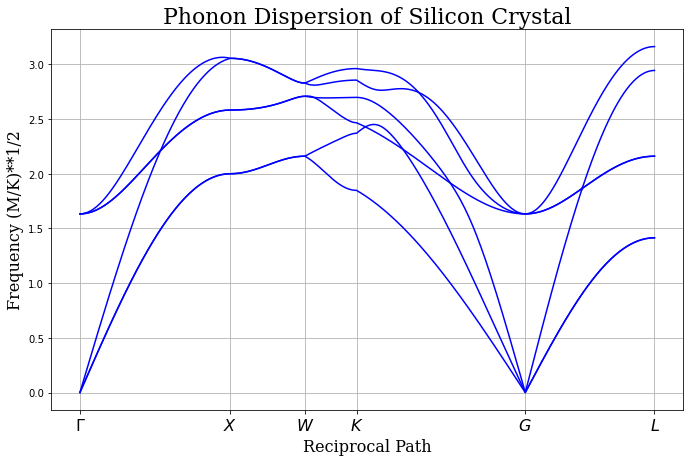

In [15]:
gr = (1+ np.sqrt(5))/2
# Make a plot of the phonon dispersion.
fig2 = plt.figure(figsize = (7*gr,7))
ax = fig2.gca()

for i in range(6):
    ax.plot(plot_path, dispersion_SiT[i], color="blue") 

ax.set_title("Phonon Dispersion of Silicon Crystal", fontfamily = "serif", fontsize = 22)
ax.set_xlabel( "Reciprocal Path", fontfamily = "serif", fontsize = 16)
ax.set_ylabel("Frequency (M/K)**1/2", fontfamily = "serif", fontsize = 16)

ticks = ["$ \Gamma $", "$ X $", "$ W $", "$ K $", "$ G $", "$L$"]
ax.set_xticks([0, int(N)-1, int(N) + int(N/2) -2, int(N) + int(N/2) + int(N/(2*np.sqrt(2))) -3, 
               int(N) + int(N/2) + int(N/(2*np.sqrt(2))) + int(N*(9/8)) -4,
               int(N) + int(N/2) + int(N/(2*np.sqrt(2))) + int(N*(9/8))+ int(N*(np.sqrt(3)/2)) -5])
ax.set_xticklabels(ticks, fontfamily = "serif", fontsize = 16)
ax.grid(True)

In [16]:
from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages('Phonon Dispersion of FCC Type Crystal.pdf')
pdf.savefig(fig1)
pdf.close()
from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages('Phonon Dispersion of Sillicon Crystal.pdf')
pdf.savefig(fig2)
pdf.close()